In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short']=='Data Analyst'].copy()

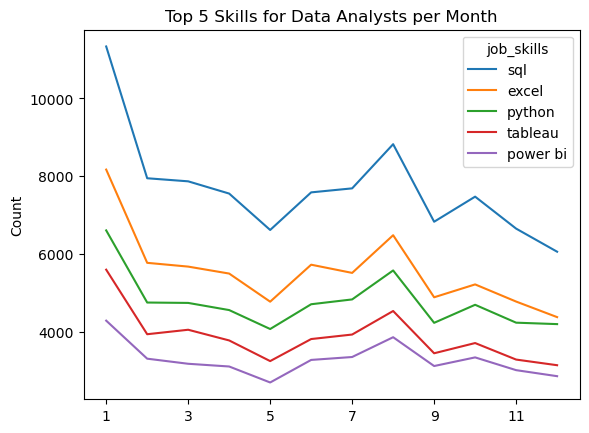

In [3]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot.iloc[:,:5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

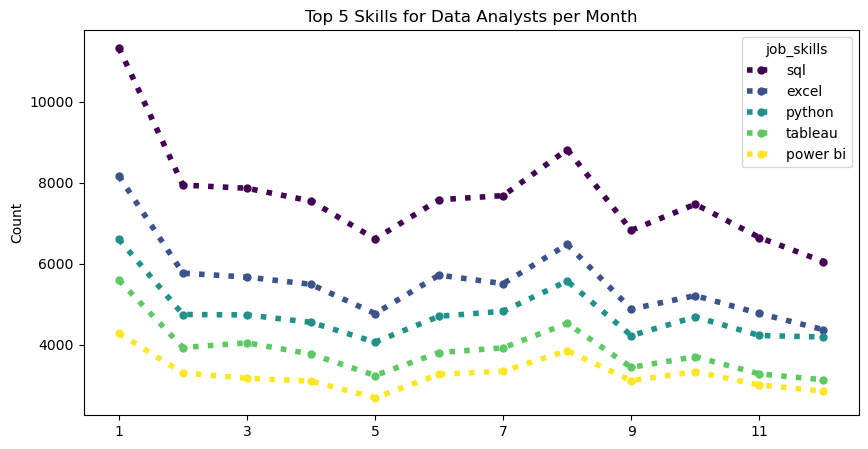

In [4]:
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth = 4,
    linestyle=':',   #options: '-', '--', '-.', ':'
    colormap = 'viridis',
    marker='o',
    markersize=5,
    figsize=(10,5)
    ) 

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

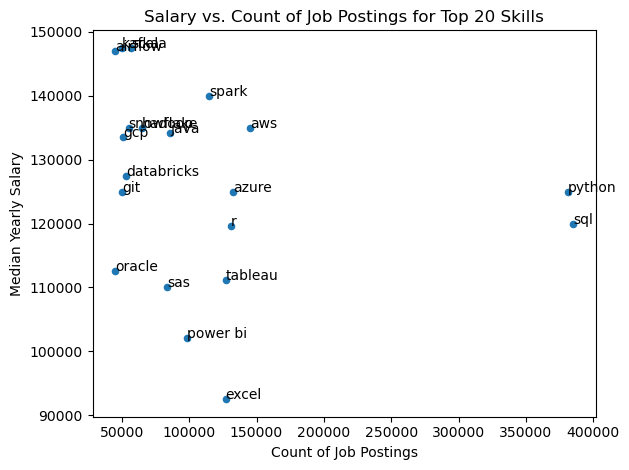

In [5]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(skill_count=('job_skills', 'count'), median_salary=('salary_year_avg', 'median'))

skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 20 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

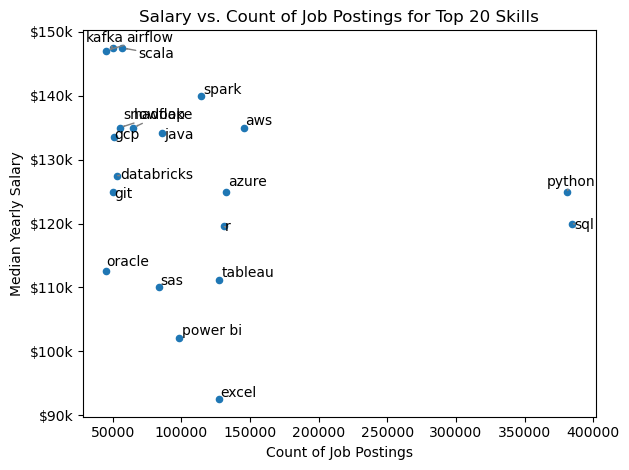

In [6]:
from adjustText import adjust_text



skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts=[]

for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 20 Skills')
plt.tight_layout()
plt.show()

Problems

In [7]:
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()

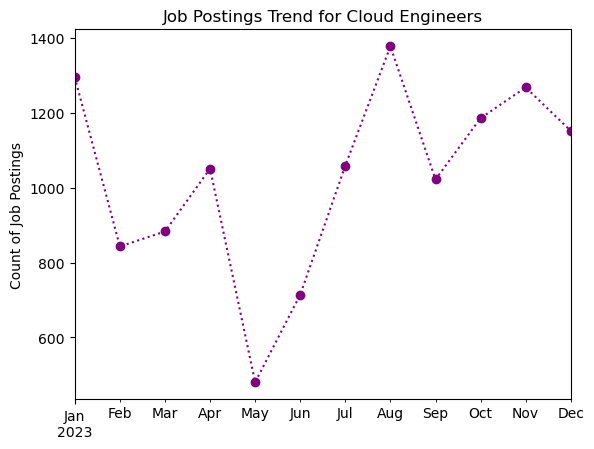

In [8]:
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()
monthly_job_postings.plot( kind='line',  linestyle=':',  color='purple',  marker='o' )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

In [9]:
SDA_df = df[df['job_title_short']=='Senior Data Analyst']

In [10]:
top5companies = SDA_df.company_name.value_counts().head()

In [11]:
top5companies

company_name
UnitedHealth Group    390
Citi                  356
Emprego               235
Wells Fargo           219
Walmart               141
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UnitedHealth Group'),
  Text(1, 0, 'Citi'),
  Text(2, 0, 'Emprego'),
  Text(3, 0, 'Wells Fargo'),
  Text(4, 0, 'Walmart')])

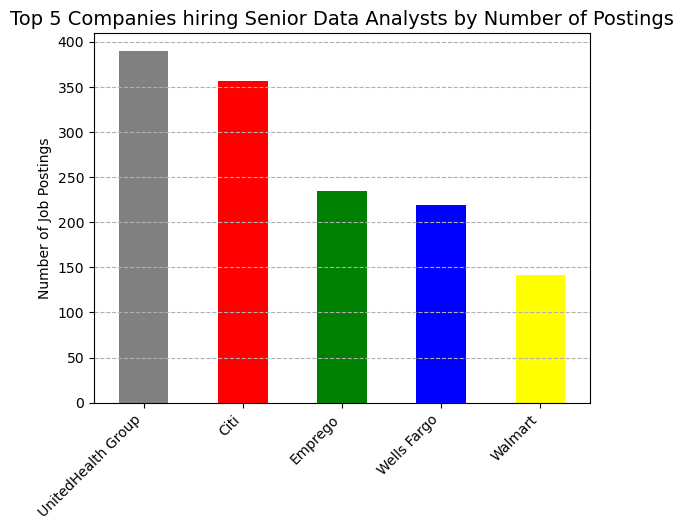

In [12]:
top5companies.plot(kind='bar', color=['gray', 'red', 'green', 'blue', 'yellow'])

plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')
